In [4]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Analysis on Storm Dataset

In [5]:
storm= pd.read_csv('APP_A/cleaned_storm_data.csv')
co2= pd.read_csv('APP_A/cleaned_energy.csv')

In [6]:
storm.head()

,Unnamed: 0,Event_id,State,State_id,Year,Month,Weather_type,County_type,County_id,County,...,End_datetime,Injuries_direct,Injuries_indirect,Deaths_direct,Deaths_indirect,Property_damage,Crop_damage,Reporter_source,Data_source,City
0,0,5570068,ILLINOIS,17,1996,October,High Wind,Z,34,HANCOCK,...,30-OCT-96 06:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple
1,1,5570362,OKLAHOMA,40,1996,October,Flash Flood,C,13,BRYAN,...,21-OCT-96 09:00:00,0,0,0,0,0,0,Unknown Source,PDC,DURANT
2,2,5570363,OKLAHOMA,40,1996,October,Hail,C,137,STEPHENS,...,20-OCT-96 19:15:00,0,0,0,0,0,0,Unknown Source,PDC,EMPIRE CITY
3,3,5537534,CALIFORNIA,6,1996,January,Winter Storm,Z,9,COASTAL MONTEREY COUNTY,...,24-JAN-96 22:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple
4,4,5538413,MINNESOTA,27,1996,January,Blizzard,Z,64,YELLOW MEDICINE,...,18-JAN-96 18:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple


In [7]:
#Drop column
storm = storm.drop('Unnamed: 0', axis=1)

In [8]:
storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549406 entries, 0 to 1549405
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Event_id           1549406 non-null  int64 
 1   State              1549406 non-null  object
 2   State_id           1549406 non-null  int64 
 3   Year               1549406 non-null  int64 
 4   Month              1549406 non-null  object
 5   Weather_type       1549406 non-null  object
 6   County_type        1549406 non-null  object
 7   County_id          1549406 non-null  int64 
 8   County             1549406 non-null  object
 9   Start_datetime     1549406 non-null  object
 10  Timezone           1549406 non-null  object
 11  End_datetime       1549406 non-null  object
 12  Injuries_direct    1549406 non-null  int64 
 13  Injuries_indirect  1549406 non-null  int64 
 14  Deaths_direct      1549406 non-null  int64 
 15  Deaths_indirect    1549406 non-null  int64 
 16  

In [9]:
storm.describe()

,Event_id,State_id,Year,County_id,Injuries_direct,Injuries_indirect,Deaths_direct,Deaths_indirect,Property_damage,Crop_damage
count,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06,1.549406e+06
mean,2.266571e+06,3.210791e+01,2.009648e+03,9.485845e+01,5.188892e-02,9.268068e-03,1.045497e-02,2.032392e-03,3.270399e+05,4.218106e+04
std,2.364921e+06,1.791742e+01,7.564976e+00,1.176740e+02,2.570989e+00,2.043084e+00,6.044902e-01,6.900881e-02,3.215922e+07,2.755926e+06
min,3.000000e+00,1.000000e+00,1.996000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.093972e+05,1.900000e+01,2.003000e+03,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.174915e+05,3.100000e+01,2.010000e+03,6.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.335828e+06,4.600000e+01,2.016000e+03,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.725449e+06,9.900000e+01,2.022000e+03,8.760000e+02,1.150000e+03,2.400000e+03,6.380000e+02,2.000000e+01,1.790000e+10,1.500000e+09


In [10]:
storm.dtypes

Event_id              int64
State                object
State_id              int64
Year                  int64
Month                object
Weather_type         object
County_type          object
County_id             int64
County               object
Start_datetime       object
Timezone             object
End_datetime         object
Injuries_direct       int64
Injuries_indirect     int64
Deaths_direct         int64
Deaths_indirect       int64
Property_damage       int64
Crop_damage           int64
Reporter_source      object
Data_source          object
City                 object
dtype: object

## EDA- Storm Dataset

### Storm Correlation 

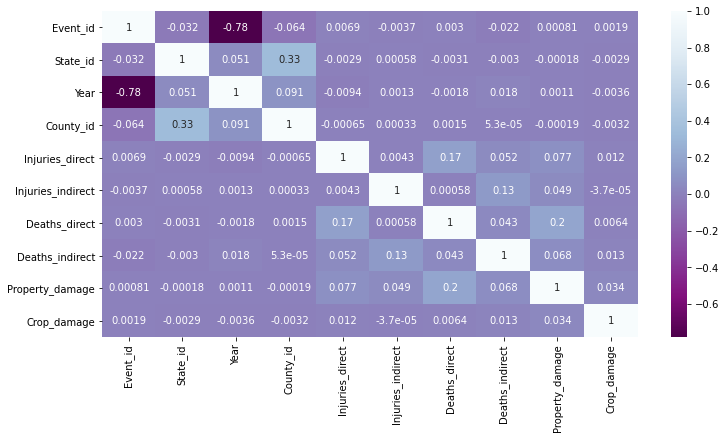

In [11]:

plt.figure(figsize=(12,6))
sns.heatmap(storm.corr(),cmap='BuPu_r',annot=True)
plt.yticks(rotation='360')
plt.show()

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
storm.head()

,Event_id,State,State_id,Year,Month,Weather_type,County_type,County_id,County,Start_datetime,Timezone,End_datetime,Injuries_direct,Injuries_indirect,Deaths_direct,Deaths_indirect,Property_damage,Crop_damage,Reporter_source,Data_source,City
0,5570068,ILLINOIS,17,1996,October,High Wind,Z,34,HANCOCK,29-OCT-96 17:10:00,CST,30-OCT-96 06:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple
1,5570362,OKLAHOMA,40,1996,October,Flash Flood,C,13,BRYAN,21-OCT-96 09:00:00,CST,21-OCT-96 09:00:00,0,0,0,0,0,0,Unknown Source,PDC,DURANT
2,5570363,OKLAHOMA,40,1996,October,Hail,C,137,STEPHENS,20-OCT-96 19:15:00,CST,20-OCT-96 19:15:00,0,0,0,0,0,0,Unknown Source,PDC,EMPIRE CITY
3,5537534,CALIFORNIA,6,1996,January,Winter Storm,Z,9,COASTAL MONTEREY COUNTY,23-JAN-96 04:00:00,PST,24-JAN-96 22:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple
4,5538413,MINNESOTA,27,1996,January,Blizzard,Z,64,YELLOW MEDICINE,17-JAN-96 09:00:00,CST,18-JAN-96 18:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple


## Top 10 states and Number of Storm Occurrences 

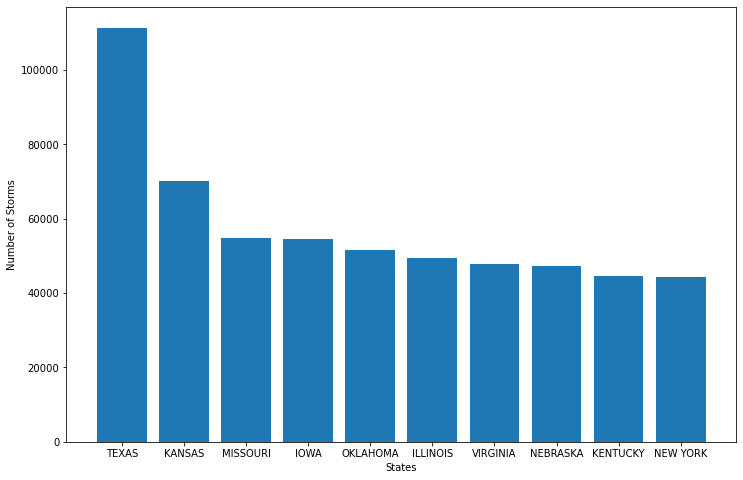

In [14]:
State = storm.groupby('State').size().sort_values(ascending=False).head(10)
plt.figure(figsize = (12,8))
plt.bar(x = State.index.tolist(), height = State.values)
plt.xlabel('States')
plt.ylabel('Number of Storms');

## Top 10 Weather Occurrences 

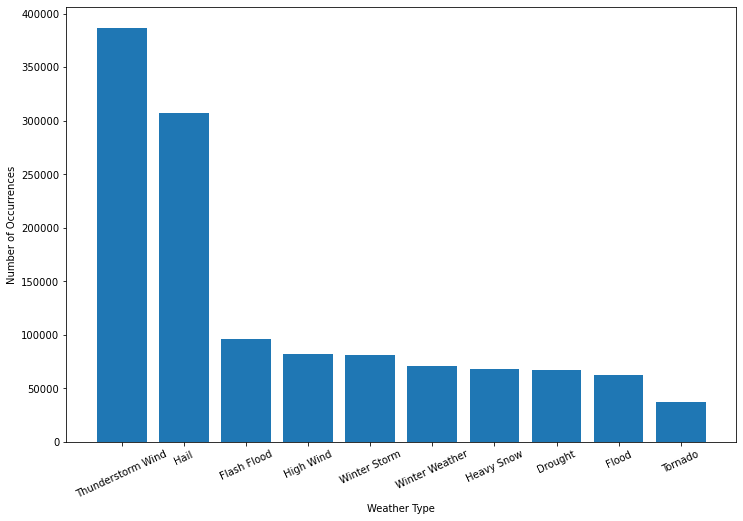

In [15]:
weather_counts = storm['Weather_type'].value_counts().head(10)
plt.figure(figsize=(12,8))
plt.bar(x=weather_counts.index, height=weather_counts.values)
plt.xticks(rotation = 25)
plt.xlabel('Weather Type')
plt.ylabel('Number of Occurrences');

## Merging CO2 and Storm Data

In [16]:
#Make temporary dataframes 
world= co2.loc[co2['Country'] == 'World']
cont= co2.loc[co2['Country'] != 'World']
contALL= cont.loc[cont['Energy_type'] == 'all_energy_types']

In [17]:
world_energy = world[world['Energy_type']== 'all_energy_types']
world_energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
0,11088,World,all_energy_types,1988,345.560876,347.412863,42106.595403,4.927545e+06,70.128405,8.206811,21163.840556,Other
948,12474,World,all_energy_types,1989,351.352356,354.008124,44075.635224,5.056794e+06,69.481243,7.971578,21842.542051,Other
1896,13860,World,all_energy_types,1990,353.544874,357.839522,49229.890519,5.294251e+06,66.779010,7.181508,22158.630158,Other
2870,15246,World,all_energy_types,1991,353.893798,355.130830,50156.762624,5.396474e+06,65.578713,7.055754,22144.802907,Other
3850,16632,World,all_energy_types,1992,352.851235,353.936051,51016.352946,5.481774e+06,64.368072,6.916434,21974.867711,Other
4876,18018,World,all_energy_types,1993,355.676348,354.594327,52108.495098,5.581569e+06,63.723367,6.825688,21766.142147,Other
5978,19404,World,all_energy_types,1994,359.522429,360.673144,53646.343445,5.663996e+06,63.475048,6.701714,21891.921080,Other
7090,20790,World,all_energy_types,1995,369.363988,368.575830,55384.826679,5.745284e+06,64.289945,6.669047,22064.884267,Other
8218,22176,World,all_energy_types,1996,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
9346,23562,World,all_energy_types,1997,380.356940,382.303301,59832.326571,5.906491e+06,64.396431,6.357047,23042.161849,Other


In [18]:
# could not directly merge the two datasets since they are too large 
# we made a new df and then merged that with our storm dataset for fewer rows and columns 
co2_storms = storm.merge(world_energy, how='inner', on='Year')

In [19]:
#want to see what our new df looks like and what information it gives us 
co2_storms.head()

,Event_id,State,State_id,Year,Month,Weather_type,County_type,County_id,County,Start_datetime,Timezone,End_datetime,Injuries_direct,Injuries_indirect,Deaths_direct,Deaths_indirect,Property_damage,Crop_damage,Reporter_source,Data_source,City,Unnamed: 0,Country,Energy_type,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
0,5570068,ILLINOIS,17,1996,October,High Wind,Z,34,HANCOCK,29-OCT-96 17:10:00,CST,30-OCT-96 06:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5826303.733,65.082709,6.591294,22552.701541,Other
1,5570362,OKLAHOMA,40,1996,October,Flash Flood,C,13,BRYAN,21-OCT-96 09:00:00,CST,21-OCT-96 09:00:00,0,0,0,0,0,0,Unknown Source,PDC,DURANT,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5826303.733,65.082709,6.591294,22552.701541,Other
2,5570363,OKLAHOMA,40,1996,October,Hail,C,137,STEPHENS,20-OCT-96 19:15:00,CST,20-OCT-96 19:15:00,0,0,0,0,0,0,Unknown Source,PDC,EMPIRE CITY,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5826303.733,65.082709,6.591294,22552.701541,Other
3,5537534,CALIFORNIA,6,1996,January,Winter Storm,Z,9,COASTAL MONTEREY COUNTY,23-JAN-96 04:00:00,PST,24-JAN-96 22:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5826303.733,65.082709,6.591294,22552.701541,Other
4,5538413,MINNESOTA,27,1996,January,Blizzard,Z,64,YELLOW MEDICINE,17-JAN-96 09:00:00,CST,18-JAN-96 18:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5826303.733,65.082709,6.591294,22552.701541,Other


## CO2 and Storm Visualizations

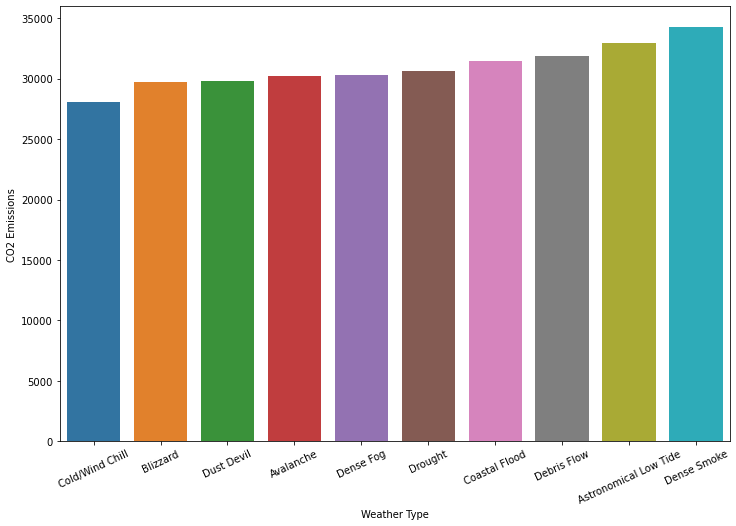

In [20]:
#We want to see the relationship between severe weather(weather_types) and co2 emissions in a region/state
# co2_emissions = co2_storms.groupby(['State', 'Weather_type'])['CO2_emissions'].mean()
co2_emissions = co2_storms.groupby(['Weather_type'])['CO2_emission'].mean().head(10).sort_values()

co2_emissions = pd.DataFrame(co2_emissions).reset_index()
plt.figure(figsize = (12,8))
plt.xticks(rotation = 25)
sns.barplot(x='Weather_type', y='CO2_emission', data=co2_emissions)
plt.xlabel('Weather Type')
plt.ylabel('CO2 Emissions');

In [21]:
co2_storms

,Event_id,State,State_id,Year,Month,Weather_type,County_type,County_id,County,Start_datetime,Timezone,End_datetime,Injuries_direct,Injuries_indirect,Deaths_direct,Deaths_indirect,Property_damage,Crop_damage,Reporter_source,Data_source,City,Unnamed: 0,Country,Energy_type,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Continent
0,5570068,ILLINOIS,17,1996,October,High Wind,Z,34,HANCOCK,29-OCT-96 17:10:00,CST,30-OCT-96 06:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
1,5570362,OKLAHOMA,40,1996,October,Flash Flood,C,13,BRYAN,21-OCT-96 09:00:00,CST,21-OCT-96 09:00:00,0,0,0,0,0,0,Unknown Source,PDC,DURANT,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
2,5570363,OKLAHOMA,40,1996,October,Hail,C,137,STEPHENS,20-OCT-96 19:15:00,CST,20-OCT-96 19:15:00,0,0,0,0,0,0,Unknown Source,PDC,EMPIRE CITY,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
3,5537534,CALIFORNIA,6,1996,January,Winter Storm,Z,9,COASTAL MONTEREY COUNTY,23-JAN-96 04:00:00,PST,24-JAN-96 22:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
4,5538413,MINNESOTA,27,1996,January,Blizzard,Z,64,YELLOW MEDICINE,17-JAN-96 09:00:00,CST,18-JAN-96 18:00:00,0,0,0,0,0,0,Unknown Source,PDC,Statewide/Multiple,22176,World,all_energy_types,379.191628,377.753171,57529.161409,5.826304e+06,65.082709,6.591294,22552.701541,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370412,813850,MISSISSIPPI,28,2019,April,Tornado,C,49,HINDS,18-APR-19 13:06:00,CST-6,18-APR-19 13:27:00,0,0,0,0,30000,50000,NWS Storm Survey,CSV,ADAMS,54054,World,all_energy_types,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,Other
1370413,813854,MISSISSIPPI,28,2019,April,Tornado,C,85,LINCOLN,18-APR-19 13:35:00,CST-6,18-APR-19 13:36:00,0,0,0,0,10000,20000,NWS Storm Survey,CSV,WILKINSON,54054,World,all_energy_types,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,Other
1370414,813844,MISSISSIPPI,28,2019,April,Tornado,C,21,CLAIBORNE,18-APR-19 12:24:00,CST-6,18-APR-19 12:25:00,0,0,0,0,1000,0,NWS Storm Survey,CSV,RUSSUM,54054,World,all_energy_types,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,Other
1370415,813861,MISSISSIPPI,28,2019,April,Tornado,C,121,RANKIN,18-APR-19 13:58:00,CST-6,18-APR-19 14:03:00,0,0,0,0,3000,0,NWS Storm Survey,CSV,PINEY WOODS,54054,World,all_energy_types,601.040490,611.508969,127690.247059,7.714631e+06,77.909168,4.707020,35584.933498,Other


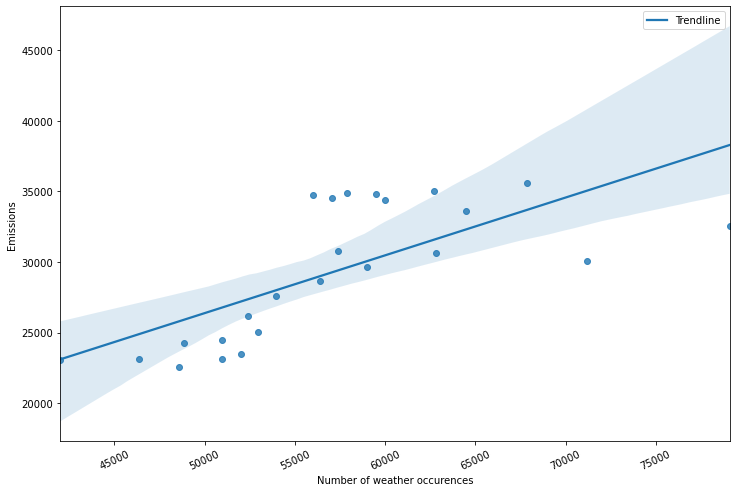

In [22]:
# Want to see if of weather has affected carbon emissions 
co2_emissions = co2_storms
# co2_emissions= co2_emissions[co2_emissions['Year'] > 1988]
co2_emissions = co2_emissions.groupby(['CO2_emission','Year'])['Weather_type'].count()

co2_emissions = pd.DataFrame(co2_emissions).reset_index()
plt.figure(figsize = (12,8))
plt.xticks(rotation = 25)
sns.regplot(x='Weather_type', y='CO2_emission', data=co2_emissions)
plt.xlabel('Number of weather occurences')
plt.ylabel('Emissions');
plt.legend(["Trendline"]);

In [23]:
wList= co2_storms['Weather_type'].unique()
wList

array(['High Wind', 'Flash Flood', 'Hail', 'Winter Storm', 'Blizzard',
       'Thunderstorm Wind', 'Cold/Wind Chill', 'Heavy Snow', 'Flood',
       'Ice Storm', 'Dense Fog', 'Winter Weather', 'Tornado', 'Avalanche',
       'Frost/Freeze', 'Lightning', 'Heat', 'Heavy Rain', 'Funnel Cloud',
       'Coastal Flood', 'Strong Wind', 'Wildfire', 'Waterspout',
       'High Surf', 'Dust Storm', 'Drought', 'Rip Current', 'Dust Devil',
       'Tropical Storm', 'Debris Flow', 'Hurricane (Typhoon)',
       'Freezing Fog', 'Storm Surge/Tide', 'Marine High Wind', 'Sleet',
       'Lake-Effect Snow', 'Astronomical Low Tide', 'Volcanic Ash',
       'Seiche', 'Extreme Cold/Wind Chill', 'Excessive Heat',
       'Marine Thunderstorm Wind', 'Northern Lights', 'Marine Hail',
       'Dense Smoke', 'Tsunami', 'Marine Strong Wind', 'Lakeshore Flood',
       'Tropical Depression', 'Volcanic Ashfall', 'Sneakerwave',
       'Marine Tropical Storm', 'Marine Dense Fog',
       'Marine Hurricane/Typhoon', 'Marine Lig

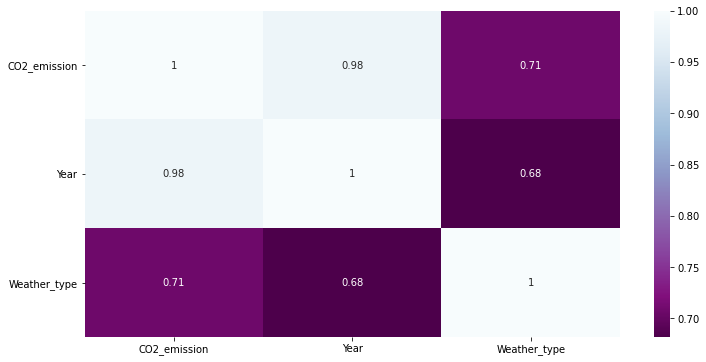

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(co2_emissions.corr(),cmap='BuPu_r',annot=True)
plt.yticks(rotation='360')
plt.show()